## Ride-Hailing Market & Weather Impact Analysis (Chicago)
Zuber es una nueva empresa de viajes compartidos que se está lanzando en Chicago. El objetivo de este proyecto es encontrar patrones en la información disponible. Deseamos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

#### Paso 4. Análisis exploratorio de datos (Python)

In [1]:
# 4.1 Importar Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Archivos
file1 = '/datasets/project_sql_result_01.csv'
file2 = '/datasets/project_sql_result_04.csv'

# Cargar datos
df_companies = pd.read_csv(file1)
df_dropoffs = pd.read_csv(file2)

# 4.2 Estudiar los datos que contiene
print(df_companies.head())
print(df_companies.info())
print(df_dropoffs.head())
print(df_dropoffs.info())


                      company_name  trips_amount
,0                        Flash Cab         19558
,1        Taxi Affiliation Services         11422
,2                Medallion Leasing         10367
,3                       Yellow Cab          9888
,4  Taxi Affiliation Service Yellow          9299
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 64 entries, 0 to 63
,Data columns (total 2 columns):
, #   Column        Non-Null Count  Dtype 
,---  ------        --------------  ----- 
, 0   company_name  64 non-null     object
, 1   trips_amount  64 non-null     int64 
,dtypes: int64(1), object(1)
,memory usage: 1.1+ KB
,None
,  dropoff_location_name  average_trips
,0                  Loop   10727.466667
,1           River North    9523.666667
,2         Streeterville    6664.666667
,3             West Loop    5163.666667
,4                O'Hare    2546.900000
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 94 entries, 0 to 93
,Data columns (total 2 columns):
, #   Column         

In [2]:
# 4.3 Revisión de tipos de datos
print(df_companies.dtypes)
print(df_dropoffs.dtypes)

company_name    object
,trips_amount     int64
,dtype: object
,dropoff_location_name     object
,average_trips            float64
,dtype: object


In [3]:
# Asegurarse de que los tipos de datos sean correctos, mimnizando errores por tipo.
df_companies['trips_amount'] = df_companies['trips_amount'].astype(int)
df_dropoffs['average_trips'] = df_dropoffs['average_trips'].astype(float)


In [4]:
# Comprobación de que los tipos de datos son correctos
print(df_companies.dtypes)
print(df_dropoffs.dtypes)


company_name    object
,trips_amount     int64
,dtype: object
,dropoff_location_name     object
,average_trips            float64
,dtype: object


In [5]:
# 4.4 Identificar los 10 principales barrios en términos de finalización 

top10_dropoffs = df_dropoffs.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar resultado
print(top10_dropoffs)


  dropoff_location_name  average_trips
,0                  Loop   10727.466667
,1           River North    9523.666667
,2         Streeterville    6664.666667
,3             West Loop    5163.666667
,4                O'Hare    2546.900000
,5             Lake View    2420.966667
,6            Grant Park    2068.533333
,7         Museum Campus    1510.000000
,8            Gold Coast    1364.233333
,9    Sheffield & DePaul    1259.766667


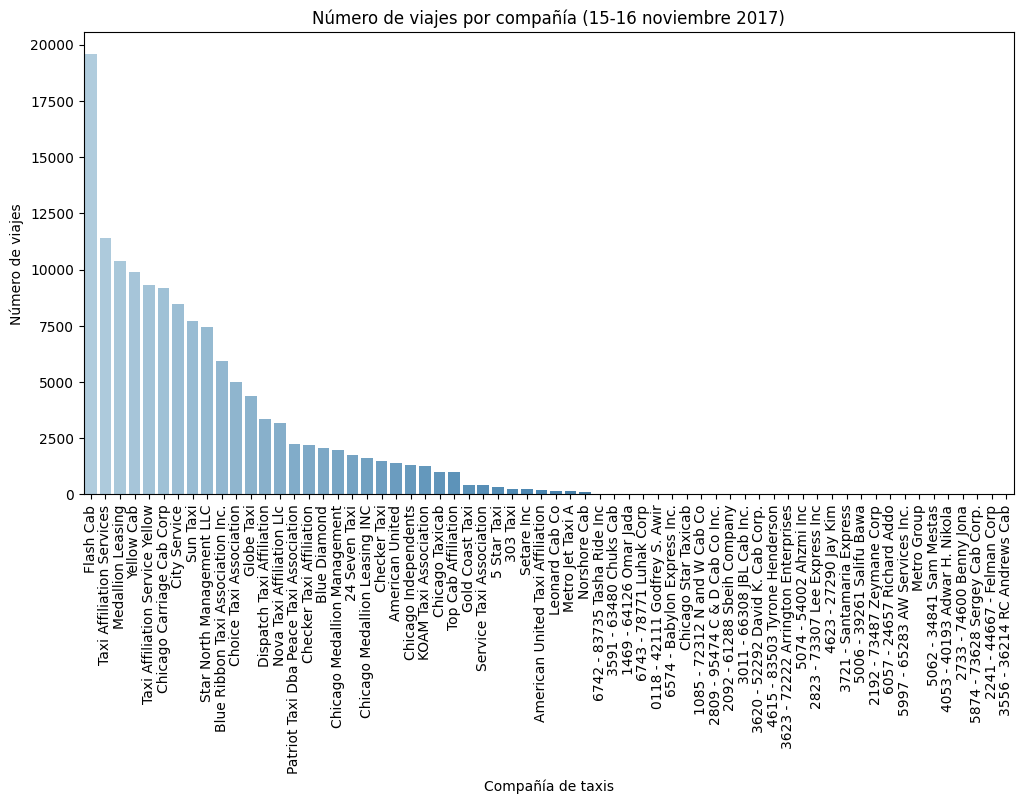

In [6]:
# 4.5.1 Gráfico 1: Compañia de taxis y número de viajes
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las compañías por número de viajes
df_companies_sorted = df_companies.sort_values(by="trips_amount", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_companies_sorted,
    x="company_name", 
    y="trips_amount", 
    palette="Blues_d"
)
plt.xticks(rotation=90)
plt.title("Número de viajes por compañía (15-16 noviembre 2017)")
plt.xlabel("Compañía de taxis")
plt.ylabel("Número de viajes")
plt.show()

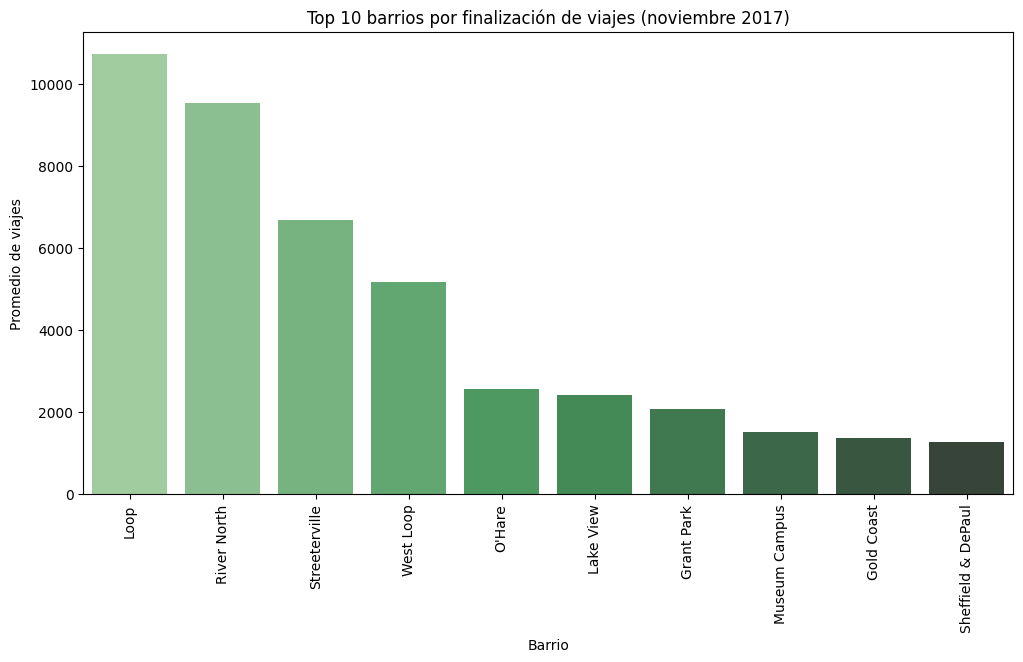

In [7]:
# 4.5.2 Gráfico 2: Top 10 de barrios por número de finalizaciones

# Seleccionar top 10 barrios
top10_dropoffs = df_dropoffs.sort_values(by="average_trips", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_dropoffs,
    x="dropoff_location_name", 
    y="average_trips", 
    palette="Greens_d"
)
plt.xticks(rotation=90)
plt.title("Top 10 barrios por finalización de viajes (noviembre 2017)")
plt.xlabel("Barrio")
plt.ylabel("Promedio de viajes")
plt.show()

##### 4.6 Conclusiones del análisis exploratorio de las compañias de Taxi y los barrios de Chicago en donde se concluyo el viaje; durante el 15 y 16 de Noviembre de 2017.

Los gráficos anteriores muentran el análisis de los datos de los viajes del 15 y 16 de noviembre de 2017 y el promedio de viajes finalizados durante noviembre en los barrios de Chicago.

Primeramente, se puede concluir que el mercado de viajes está altamente concentrado. Compañías como Flash Cab y Taxi Affiliation Services concentran una proporción significativa del total de viajes en tan solo dos días. El resto de las empresas tiene una participación mucho menor, lo que indica una estructura de mercado dominada por unos pocos actores clave.

El análisis de los barrios con mayor número de finalizaciones de recorrido muestra que la demanda de viajes se concentra principalmente en puntos estratégicos de la ciudad. Destacan el aeropuerto internacional O’Hare y el barrio Loop, junto con otras zonas de alta movilidad. Estos resultados son consistentes con los patrones esperados en grandes urbes, donde los centros financieros y los nodos de transporte concentran la mayor parte de los desplazamientos.

En conclusion el analisis muestra que tanto la oferta como la demanda están altamente concentradas. Por un lado, pocas compañías controlan gran parte del mercado de viajes; por el otro, los usuarios se concentran en unos pocos barrios estratégicos. Esto sugiere que, para lograr una inserción competitiva, Zuber debería enfocar sus operaciones iniciales en:
 - Competir directamente en los barrios de mayor demanda (como O’Hare y Loop).
 - Enfrentar a las compañías líderes que ya concentran gran parte de la   actividad.
   
En conjunto, estos hallazgos ofrecen una hoja de ruta clara para la estrategia comercial: Zuber deberá posicionarse en zonas de alta densidad de viajes y diseñar campañas específicas para captar usuarios que actualmente utilizan a los principales competidores.

#### Paso 5. Prueba de hipótesis (Python)

Prueba de la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Se trata de una prueba bilateral (dos colas), porque no se asume de antemano si los viajes duran más o menos, solo que podrían diferir.

Queremos comprobar si la duración promedio cambia en sábados lluviosos:

H₀ (hipótesis nula): la duración promedio de los viajes Loop → O’Hare es igual en sábados lluviosos y en sábados no lluviosos.
H₁ (hipótesis alternativa): la duración promedio de los viajes Loop → O’Hare cambia en sábados lluviosos.


In [8]:
import pandas as pd
from scipy import stats as st

# Cargar el dataset con los viajes Loop → O'Hare
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Vista rápida
print(df_trips.head())
print(df_trips['weather_conditions'].value_counts())


              start_ts weather_conditions  duration_seconds
,0  2017-11-25 16:00:00               Good            2410.0
,1  2017-11-25 14:00:00               Good            1920.0
,2  2017-11-25 12:00:00               Good            1543.0
,3  2017-11-04 10:00:00               Good            2512.0
,4  2017-11-11 07:00:00               Good            1440.0
,Good    888
,Bad     180
,Name: weather_conditions, dtype: int64


In [9]:
# Dividir según condiciones climáticas
bad_weather = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']

print("Muestra viajes lluviosos:", bad_weather.shape[0])
print("Muestra viajes buen clima:", good_weather.shape[0])


Muestra viajes lluviosos: 180
,Muestra viajes buen clima: 888


In [10]:
# Verificar varianzas.  

# Si p > 0.05 → varianzas iguales.
# Si p <= 0.05 → varianzas distintas.

levene_stat, levene_p = st.levene(bad_weather, good_weather)
print("p-valor de Levene:", levene_p)


p-valor de Levene: 0.5332038671974493


In [11]:
# Prueba t de Student

alpha = 0.05  # nivel de significación

t_stat, p_val = st.ttest_ind(bad_weather, good_weather, equal_var=False)  # Welch’s t-test
print("Estadístico t:", t_stat)
print("p-valor:", p_val)

if p_val < alpha:
    print("Rechazamos H₀ → la duración promedio cambia los sábados lluviosos")
else:
    print("No rechazamos H₀ → no hay evidencia suficiente de que cambie")


Estadístico t: 7.186034288068629
,p-valor: 6.738994326108734e-12
,Rechazamos H₀ → la duración promedio cambia los sábados lluviosos


Se planteó la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare cambia los sábados lluviosos.
Con un nivel de significación de α = 0.05, se aplicó una prueba t de Student para muestras independientes (Welch’s t-test). El p-valor obtenido (≈ 6.7e-12) es muy inferior al umbral de 0.05, por lo que se rechaza la hipótesis nula (H₀).
Esto significa que existen diferencias estadísticamente significativas en la duración promedio de los viajes entre sábados con lluvia y sábados con buen clima. En consecuencia, se concluye que el clima lluvioso impacta de forma clara en la duración de los trayectos entre el Loop y el Aeropuerto O’Hare.

#### Conclusiones generales del proyecto:

A lo largo del proyecto se analizaron los datos de viajes en taxi en Chicago durante noviembre de 2017 con el objetivo de comprender las preferencias de los pasajeros y evaluar el impacto del clima en los recorridos. En primer lugar, se recuperó y exploró la información meteorológica de la ciudad, lo que permitió enriquecer los análisis de movilidad. Posteriormente, mediante consultas SQL, se examinaron los viajes de distintas compañías de taxis, identificando a Flash Cab y Taxi Affiliation Services como los actores dominantes del mercado, mientras que el resto de las empresas presentaron volúmenes significativamente menores. El análisis de los barrios con mayor número de viajes finalizados mostró que la demanda se concentra en puntos estratégicos como el Aeropuerto Internacional O’Hare y el Loop, reflejando patrones de movilidad característicos de las grandes ciudades. Con apoyo de Python se representaron estas tendencias gráficamente, lo que facilitó visualizar tanto la concentración del mercado en pocas compañías como la fuerte demanda en determinadas zonas de la ciudad. Finalmente, se probó la hipótesis estadística acerca de la influencia del clima en los viajes desde el Loop hasta O’Hare los sábados. Los resultados del test t confirmaron que las duraciones promedio de los recorridos cambian de manera significativa bajo condiciones de lluvia, lo que demuestra el impacto directo de las condiciones meteorológicas en la operación de los servicios de transporte.
En conjunto, los hallazgos sugieren que la compañía Zuber, en su entrada al mercado de Chicago, debería enfocar sus esfuerzos en competir en las zonas de mayor concentración de viajes (O’Hare y Loop) y frente a las compañías líderes que ya dominan el sector. Asimismo, el análisis pone de manifiesto la necesidad de considerar factores externos como el clima al planificar la asignación de vehículos, ya que estos influyen directamente en la duración y eficiencia de los trayectos.